In [1]:
import pyreadr
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from dredFISH.Utils.__init__plots import *

In [2]:
f = 'SamplesheetAgeP39final.csv'
meta = pd.read_csv(f)
meta

,OriginalOrderInBatch,ExternalSampleID,Basename,Age,ConfidenceInAgeEstimate,CanBeUsedForAgingStudies,SpeciesLatinName,SpeciesCommonName,Tissue,Female,...,Steve.InterventionClock.AgeTraf.Cortex.clock.epiAge,Steve.InterventionClock.AgeTraf.Fibroblast.clock.epiAge,Steve.InterventionClock.AgeTraf.Heart.clock.epiAge,Steve.InterventionClock.AgeTraf.Kidney.clock.epiAge,Steve.InterventionClock.AgeTraf.Liver.clock.epiAge,Steve.InterventionClock.AgeTraf.Muscle.clock.epiAge,Steve.InterventionClock.AgeTraf.panTissue.clock.epiAge,Steve.InterventionClock.AgeTraf.Skin.clock.epiAge,Steve.InterventionClock.AgeTraf.Striatum.clock.epiAge,Steve.InterventionClock.AgeTraf.Tail.clock.epiAge
0,1,20147-9 #1,206535570066_R05C02,0.333333,100,yes,Mus musculus,Mouse,Olfactory Bulb,0,...,4.033001,4.926304,0.842963,1.900062,0.269345,2.317238,0.149250,0.662770,4.115116,0.536970
1,2,20207-9 #1,206535570066_R06C02,0.416667,100,yes,Mus musculus,Mouse,Olfactory Bulb,1,...,3.847563,1.656940,0.257613,2.984474,0.363235,1.440735,1.012970,0.485708,4.394053,1.194265
2,3,17016-9 #1,206535570010_R01C01,0.391667,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,3.447378,2.460107,-0.041745,0.386455,0.360516,2.363680,0.459224,0.400640,5.752594,1.929016
3,4,17100-9B #1,206535570010_R02C01,0.275000,100,yes,Mus musculus,Mouse,Meninges,0,...,2.556212,1.965027,-0.058308,2.483933,0.127727,1.599632,0.273974,0.232241,5.726338,2.257875
4,5,18161-10B #1,206535570010_R03C01,0.308333,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,4.328767,6.060459,-0.016699,3.926171,0.505825,3.300223,0.165580,0.695521,1.290540,0.561456
5,6,20074-9B #1,206535570010_R04C01,0.300000,100,yes,Mus musculus,Mouse,Retro-orbital,1,...,5.105332,2.609845,0.132868,0.668717,0.432172,1.498241,0.568705,0.620582,2.912459,0.426205
6,7,20095-9 #1,206535570010_R05C01,0.416667,100,yes,Mus musculus,Mouse,Optic nerve,0,...,2.409617,0.126154,-0.020210,0.163322,0.205064,0.421941,0.543390,0.260301,1.648521,0.348279
7,8,20137-9 #1,206535570010_R06C01,0.258333,100,yes,Mus musculus,Mouse,Olfactory bulb,0,...,3.407836,0.888272,0.304209,1.353959,0.223376,0.726891,0.534108,0.285111,2.566658,0.646184
8,9,20142-9 #1,206535570010_R01C02,0.366667,100,yes,Mus musculus,Mouse,Nasal cavity,1,...,3.945867,2.776968,1.454515,2.627008,0.435729,3.059793,0.680205,0.646078,4.466324,0.501263
9,10,20191-9 #1,206535570010_R02C02,0.400000,100,yes,Mus musculus,Mouse,Throat,1,...,5.342979,4.463271,0.928019,0.044868,0.346802,3.442907,0.200563,0.687147,5.833257,0.548300


In [3]:
f = "all_probes_sesame_normalized.RDS" 
df = pyreadr.read_r(f)[None]
df = df.T
df

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165_TC21,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001209_TC21,0.709015,0.647783,0.642106,0.558514,0.670084,0.668659,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364_TC21,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582_TC21,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920_TC21,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309_BC21,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570_BC11,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764_BC21,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295_BC11,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


In [4]:
df.describe()

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
count,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000,326732.000000
mean,0.535139,0.536364,0.514974,0.501312,0.519737,0.566856,0.548533,0.552345,0.541240,0.561376,0.522302,0.562307
std,0.288524,0.299170,0.287610,0.302246,0.289781,0.299838,0.295427,0.293808,0.285851,0.305316,0.280678,0.295874
min,0.006296,0.005647,0.006295,0.005994,0.006519,0.005877,0.005810,0.005902,0.007799,0.006692,0.006082,0.006051
25%,0.334832,0.320371,0.293872,0.217763,0.305031,0.367062,0.337782,0.357133,0.342960,0.317940,0.319276,0.363300
50%,0.566715,0.568511,0.541148,0.523371,0.540397,0.615678,0.597148,0.608184,0.587837,0.612766,0.560475,0.615114
75%,0.783936,0.795526,0.758311,0.780625,0.772256,0.835346,0.804693,0.801159,0.783195,0.841453,0.756647,0.820856
max,0.993440,0.994863,0.993474,0.993614,0.992779,0.994300,0.993128,0.994064,0.991962,0.992884,0.992975,0.993025


In [5]:
np.unique([i[:2]for i in df.index.values])

array(['cg', 'ch', 'rs'], dtype='<U2')

In [6]:
cgs = df.filter(regex='^cg', axis=0)
chs = df.filter(regex='^ch', axis=0)
rss = df.filter(regex='^rs', axis=0)
cgs.shape, chs.shape, rss.shape, len(cgs)+len(chs)+len(rss)

((324480, 12), (842, 12), (1410, 12), 326732)

In [7]:
cgs.describe()

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
count,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000,324480.000000
mean,0.533916,0.535037,0.513736,0.499980,0.518423,0.565886,0.547452,0.551285,0.540152,0.560493,0.521222,0.561326
std,0.287712,0.298192,0.286900,0.301642,0.288910,0.299288,0.294831,0.293189,0.285217,0.305019,0.280171,0.295372
min,0.006296,0.005647,0.006295,0.005994,0.006519,0.005877,0.005810,0.005902,0.007799,0.006692,0.006082,0.006051
25%,0.334347,0.319937,0.293189,0.216992,0.304519,0.366567,0.337111,0.356506,0.342392,0.317091,0.318390,0.362622
50%,0.565247,0.567023,0.539887,0.522014,0.538988,0.614194,0.595871,0.606980,0.586631,0.611374,0.559371,0.613846
75%,0.781669,0.792672,0.756164,0.778643,0.769508,0.833652,0.802752,0.799418,0.781376,0.840283,0.755167,0.819326
max,0.993440,0.994863,0.993474,0.993614,0.992779,0.994300,0.993128,0.994064,0.991962,0.992884,0.992975,0.993025


In [8]:
chs.describe()

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,0.884151,0.920475,0.844412,0.841458,0.878674,0.871927,0.867042,0.868545,0.855581,0.833639,0.807633,0.866417
std,0.119164,0.096050,0.145107,0.145583,0.124280,0.127269,0.129416,0.130849,0.131401,0.143874,0.156873,0.127463
min,0.144964,0.201578,0.163534,0.128140,0.144365,0.178969,0.130009,0.092383,0.160967,0.137672,0.116085,0.173196
25%,0.850473,0.916975,0.771815,0.758112,0.847322,0.833224,0.819053,0.819422,0.801828,0.751172,0.677058,0.819148
50%,0.936719,0.955987,0.910335,0.907197,0.934172,0.928342,0.926072,0.927116,0.913489,0.897104,0.871817,0.926011
75%,0.963414,0.971319,0.953754,0.954120,0.961120,0.959459,0.958692,0.960645,0.950548,0.946197,0.941207,0.957043
max,0.985949,0.986554,0.988037,0.986137,0.987480,0.985092,0.984925,0.986355,0.981763,0.982800,0.980010,0.982876


In [9]:
rss.describe()

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,0.608085,0.612295,0.603123,0.604837,0.607746,0.607944,0.607093,0.607493,0.603988,0.602091,0.600433,0.606327
std,0.392268,0.421544,0.374995,0.370280,0.394913,0.390264,0.382375,0.385050,0.374769,0.363674,0.348981,0.375685
min,0.013577,0.008540,0.009225,0.014570,0.009490,0.011495,0.011946,0.009987,0.015124,0.011848,0.012580,0.013932
25%,0.116015,0.064366,0.167262,0.182436,0.109703,0.125879,0.150818,0.143937,0.156555,0.200630,0.260544,0.155714
50%,0.858306,0.918075,0.800643,0.794603,0.868464,0.855730,0.832190,0.834226,0.813784,0.772157,0.732914,0.806081
75%,0.957788,0.970763,0.950135,0.948766,0.958640,0.956806,0.953567,0.953893,0.943418,0.942120,0.932580,0.950996
max,0.988660,0.992898,0.988938,0.989017,0.990655,0.988653,0.990540,0.989369,0.984834,0.986554,0.988765,0.988199


In [10]:
pca = PCA(n_components=12)
pcs = pca.fit_transform(cgs.values.T)
print(pca.explained_variance_ratio_)
res = pd.DataFrame(pcs, 
                   columns=np.char.add('PC', (np.arange(12)+1).astype(str)),
                   index=cgs.columns
                  )
res = res.join(meta.set_index('Basename'))

# clustering
km = KMeans(n_clusters=3)
clsts = km.fit_predict(pcs)
res['clst_k3'] = np.char.add('C', clsts.astype(str))
res

[2.75137998e-01 1.53333276e-01 1.14603256e-01 8.88999450e-02
 7.15479066e-02 6.65384220e-02 5.93314542e-02 5.31304495e-02
 4.89001276e-02 4.39675791e-02 2.46095862e-02 3.97253065e-30]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Steve.InterventionClock.AgeTraf.Fibroblast.clock.epiAge,Steve.InterventionClock.AgeTraf.Heart.clock.epiAge,Steve.InterventionClock.AgeTraf.Kidney.clock.epiAge,Steve.InterventionClock.AgeTraf.Liver.clock.epiAge,Steve.InterventionClock.AgeTraf.Muscle.clock.epiAge,Steve.InterventionClock.AgeTraf.panTissue.clock.epiAge,Steve.InterventionClock.AgeTraf.Skin.clock.epiAge,Steve.InterventionClock.AgeTraf.Striatum.clock.epiAge,Steve.InterventionClock.AgeTraf.Tail.clock.epiAge,clst_k3
206535570066_R05C02,12.780395,-9.060352,-10.716593,2.169390,-9.234852,-0.679982,28.548766,0.036261,-12.217676,2.248377,...,4.926304,0.842963,1.900062,0.269345,2.317238,0.149250,0.662770,4.115116,0.536970,C0
206535570066_R06C02,-4.731102,-10.113422,15.923239,-18.841498,-20.058267,-9.565642,-13.805550,-3.596207,-13.120093,-13.832003,...,1.656940,0.257613,2.984474,0.363235,1.440735,1.012970,0.485708,4.394053,1.194265,C0
206535570010_R01C01,10.298095,6.367834,27.723378,-1.218372,16.576927,28.152201,1.552512,-3.942620,-9.440955,-1.545282,...,2.460107,-0.041745,0.386455,0.360516,2.363680,0.459224,0.400640,5.752594,1.929016,C0
206535570010_R02C01,67.233156,5.623148,-23.900154,-2.884418,6.526486,-1.633307,-13.301283,-0.305522,-0.781439,-0.715266,...,1.965027,-0.058308,2.483933,0.127727,1.599632,0.273974,0.232241,5.726338,2.257875,C2
206535570010_R03C01,11.171397,-2.144387,25.581908,24.700521,11.920391,-25.438458,2.342260,4.282514,1.646230,-1.445558,...,6.060459,-0.016699,3.926171,0.505825,3.300223,0.165580,0.695521,1.290540,0.561456,C0
206535570010_R04C01,-24.522835,-8.140081,-16.539401,21.744206,0.033503,4.974714,-5.209790,-25.469147,4.537978,-8.249701,...,2.609845,0.132868,0.668717,0.432172,1.498241,0.568705,0.620582,2.912459,0.426205,C0
206535570010_R05C01,-25.578015,-23.923934,-6.912820,-23.699100,24.708739,-6.835462,-2.203773,1.540420,6.626702,4.633725,...,0.126154,-0.020210,0.163322,0.205064,0.421941,0.543390,0.260301,1.648521,0.348279,C0
206535570010_R06C01,-9.069144,-10.131502,-10.179209,-5.800787,-1.095441,-1.861077,10.629688,1.309704,-5.493775,3.589423,...,0.888272,0.304209,1.353959,0.223376,0.726891,0.534108,0.285111,2.566658,0.646184,C0
206535570010_R01C02,2.203616,0.834563,11.837879,-0.634565,-16.323080,1.388081,-7.341427,-7.269529,7.411913,27.540857,...,2.776968,1.454515,2.627008,0.435729,3.059793,0.680205,0.646078,4.466324,0.501263,C0
206535570010_R02C02,-25.975742,56.337386,-7.848973,-6.886691,3.064173,-7.097693,1.582677,0.640051,-2.412207,-0.365470,...,4.463271,0.928019,0.044868,0.346802,3.442907,0.200563,0.687147,5.833257,0.548300,C1


In [11]:
res.iloc[0]

PC1                                                       12.780395
PC2                                                       -9.060352
PC3                                                      -10.716593
PC4                                                         2.16939
PC5                                                       -9.234852
                                                            ...    
Steve.InterventionClock.AgeTraf.panTissue.clock.epiAge      0.14925
Steve.InterventionClock.AgeTraf.Skin.clock.epiAge           0.66277
Steve.InterventionClock.AgeTraf.Striatum.clock.epiAge      4.115116
Steve.InterventionClock.AgeTraf.Tail.clock.epiAge           0.53697
clst_k3                                                          C0
Name: 206535570066_R05C02, Length: 241, dtype: object

Text(0, 0.5, 'Fraction of variance explained')

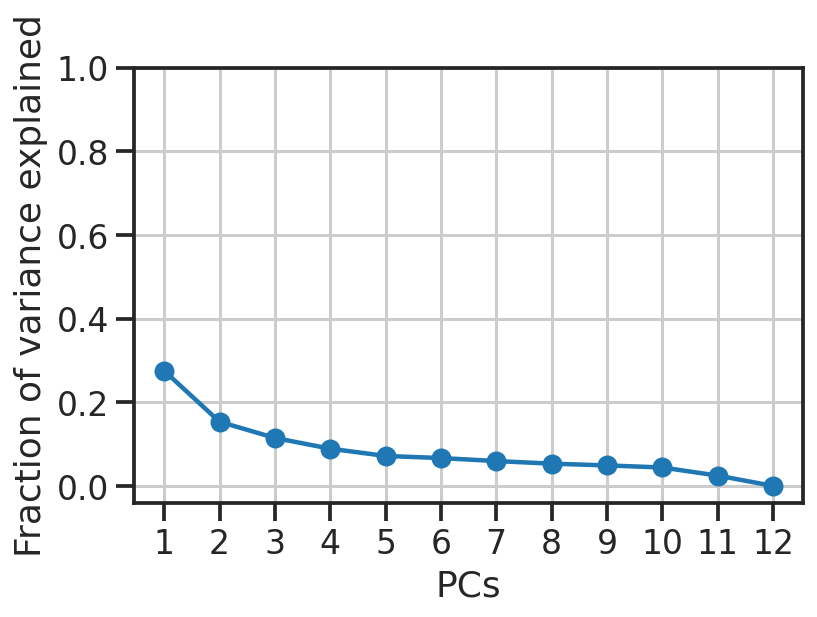

In [12]:
plt.plot(np.arange(12)+1, pca.explained_variance_ratio_, '-o')
plt.ylim([-0.04, 1])
plt.xticks(np.arange(12)+1)
plt.xlabel("PCs")
plt.ylabel("Fraction of variance explained")


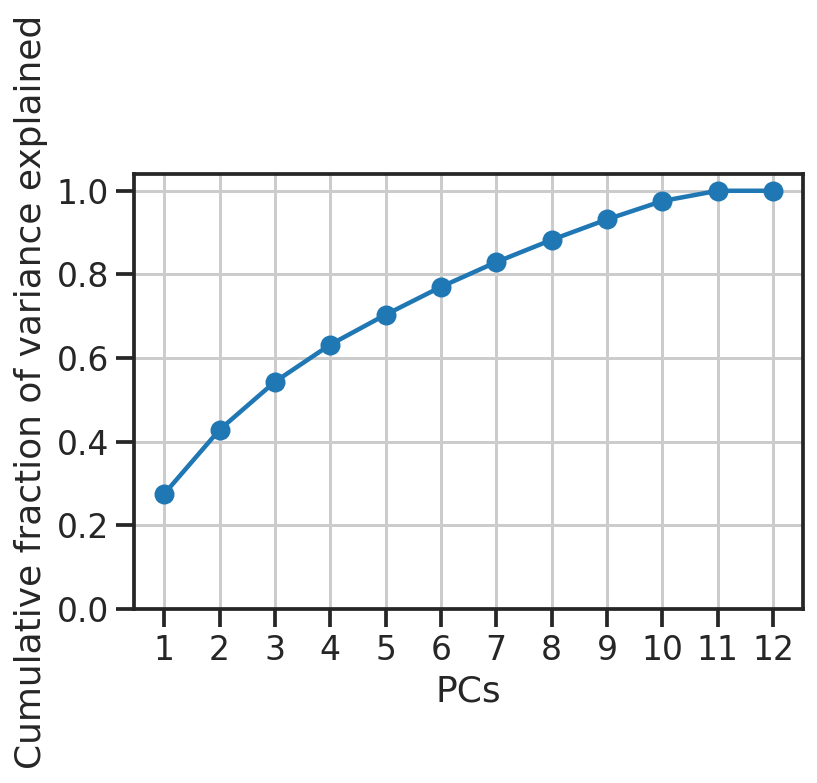

In [13]:
plt.plot(np.arange(12)+1, np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xticks(np.arange(12)+1)
plt.ylim([0, 1.04])
plt.xlabel("PCs")
plt.ylabel("Cumulative fraction of variance explained")
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

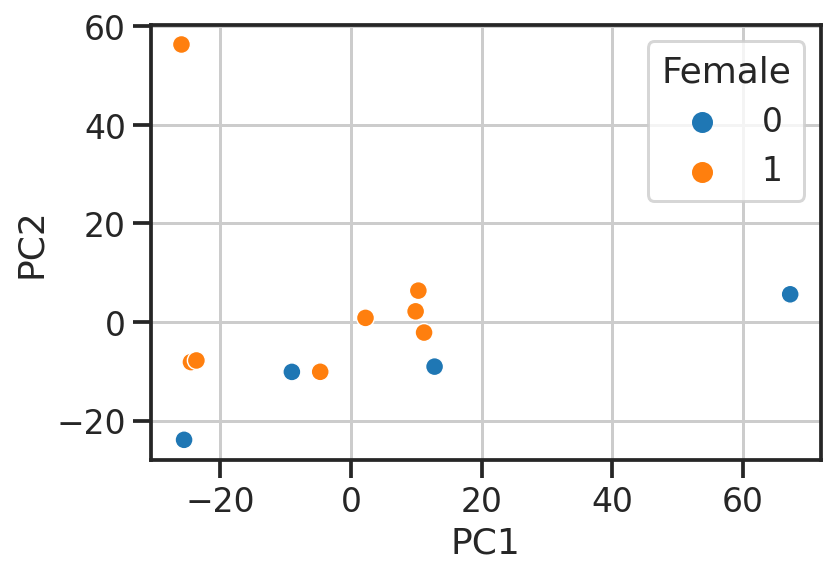

In [14]:
sns.scatterplot(data=res, x='PC1', y='PC2', hue='Female')

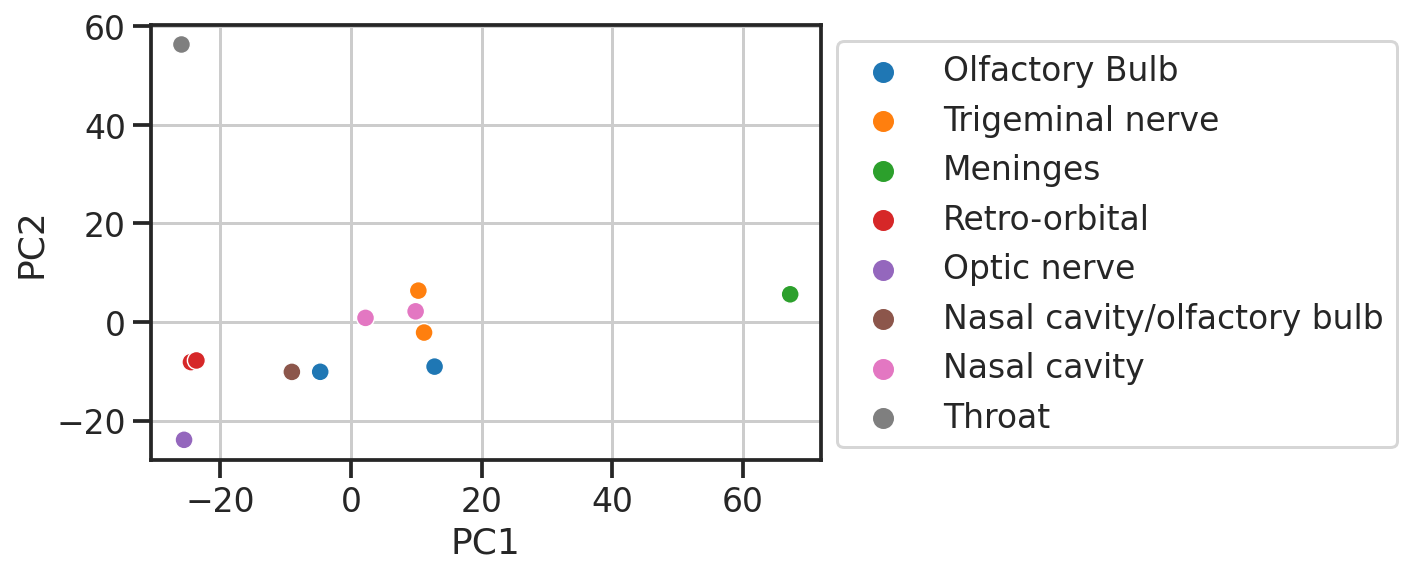

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(data=res, x='PC1', y='PC2', hue='TissueDetailed', ax=ax)
ax.legend(bbox_to_anchor=(1,1))


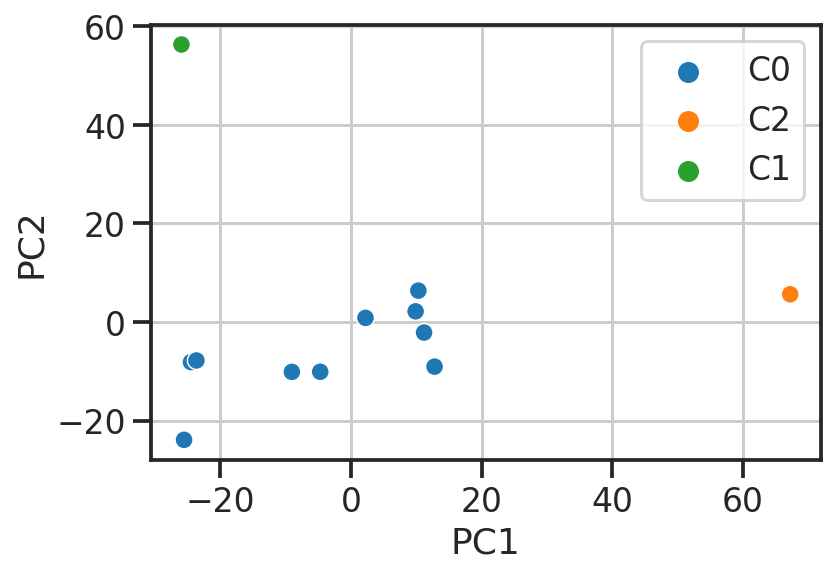

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(data=res, x='PC1', y='PC2', hue='clst_k3', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

In [17]:
# sns.boxplot(data=cgs, ) #res, x='PC1', y='PC2', hue='Female')

In [18]:
# hierarchical clustering on PCs
# K-means 
pcs.shape

(12, 12)